This notebook demonstrates the ability to apply the `ID` algorithm with multiple treatments and outcomes.

It was motivated by [this post](https://www.linkedin.com/posts/ckassaad_causalinference-docalculus-clustergraphs-activity-7352978070431031297-ssFV?utm_source=social_share_send&utm_medium=member_desktop_web&rcm=ACoAAAwu35UBGzYu8pHuw7f1n8DbaEUawviIphM), which explores the relation between simple ADMGs and _cluster graphs_, such as in the following example:

![](images/1753086582242.jpg)

In [1]:
from y0.dsl import W1, W2, W3, W4, X1, X2, X3, Y1, Y2
from y0.graph import NxMixedGraph

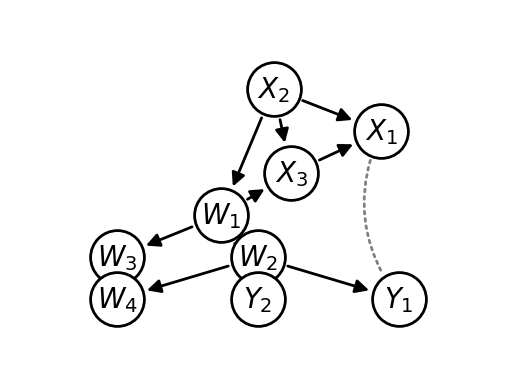

In [2]:
graph = NxMixedGraph.from_edges(
    directed=[
        (X2, X1),
        (X2, X3),
        (X2, W1),
        (X3, X1),
        (W1, X3),
        (W1, W3),
        (W2, W4),
        (W2, Y1),
        (Y2, W2),
    ],
    undirected=[(X1, Y1), (W1, W2)],
)

# for sure, there's room for improvement on drawing :)
graph.draw()

In [3]:
from y0.algorithm.identify import identify_outcomes

In [4]:
identify_outcomes(graph, treatments=[X1, X2, X3], outcomes=[Y1, Y2])

Sum[W2](Sum[W1, W3, W4, X1, X2, X3](P(W1, W2, W3, W4, X1, X2, X3, Y1, Y2)))